# Introduction


## Data Challenge for the course Machine Learning and Data Mining

### Authors: 
#### Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Awais Hussain Sani, Stephan Clémençon


# Supervised anomaly detection

**Anomaly detection** (or **outlier detection**) comprises the **machine learning** methods aimed at identification of observations that exhibit suspicious behaviour and are very likely to cause a problem. 

This data set is provided by Valeo, the French one of the largest Original Equipment Manufacturer. It regards the task of the supervised anomaly detection on a production line. For each of the produced items, a set of properties are measured, and finally a special testing procedure verifies that the item is intact. Thus, all the observations are labeled as normal or defect (anomalies), with anomalies being rare.

Statistically, this is formalized as the supervised anomaly detection, because the correct labels are given during training. This can also be seen as a task of supervised classification with two very dis-equilibrated classes.

You are suggested to construct an anomaly detection rule which, for each new observation, provides an anomaly score, that is the score is higher for more abnormal observation. This would allow to detect anomaly just based on measured parameters of the item without running a mechanical testing procedure.

# The properties of the dataset:


The data set is provided by Valeo and consistst of the measures of 27 properties of produced items and their labels identifying whether an item is intact or defect (= anomaly).

### Training data: 

The training set consists of files, **valeo_xtrain.csv** and **valeo_ytrain.csv**.

File **valeo_xtrain.csv** contains one observation per row, each observation having 27 entries.

File **valeo_ytrain.csv** contains one observation per row, each observation having 1 entry identifying whether it is an anomay (**1**) or not (**0**).

There are in total **27586** training observations.

### Test data:

The testing set consists of one file, **valeo_xtest.csv**, which has the same structure as file **valeo_xtrain.csv**.

There are in total **27587** test observations.

### Remark:

The task of the **supervised anomaly detection** can be difficult, in the sense that the classes are heavily disequilibrated.

## The performance criterion:

You should submit a file that contains in each row anomaly score (a real vaule) for the observation in the corresponding row of the file **valeo_xtest.csv**. For a sample submission please see the code below. Please note, that your score should provide ordering which allows to identify anomalies, i.e., the higher the value of the score, the **more abnormal** the observation should be considered.

The performance criterion is the **Area Under the Receiver Operating Characteristic** (AUC), see also:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

# Training Data

Training data, input (file **valeo_xtrain.csv**): https://partage.imt.fr/index.php/s/zqrRggLBY8GRc9i

# Test Data 

Training data, output (file **valeo_xtest.csv**): https://partage.imt.fr/index.php/s/WpiqcjMq8ymg8zA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.cluster import DBSCAN

from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

### Load and investigate the data

In [4]:
xtrain = pd.read_csv("valeo_xtrain.csv")
print(xtrain.shape)
xtrain.head()

(27586, 27)


,START2_OP020_V_1angle,START2_OP020_V_1torque,START2_OP020_V_2angle,START2_OP020_V_2torque,START2_OP040_Vision_cosseprog,START2_OP050_Vision_paliermodel,START2_OP050_Vision_palierpresencedouille,START2_OP060_Vision_tirantcouleur,START2_OP070_V_1angle,START2_OP070_V_1prog,...,START2_OP090_SnapRingFinalStroke,START2_OP090_SnapRingMidPointForce,START2_OP090_SnapRingPeakForce,START2_OP090_StartLinePeakForce,START2_OP100_Capuchon_insertionmesure,START2_OP110_Vissage_M8angle,START2_OP110_Vissage_M8prog,START2_OP110_Vissage_M8torque,START2_OP120_RodageI_mesure,START2_OP120_RodageU_mesure
0,35.7,3.76,49.1,3.78,300.0,1.0,1.0,2.0,111.7,8.0,...,11.60,71.52,122.23,20.57,0.55,34.7,2.0,9.54,126.96,11.97
1,47.2,3.77,50.3,3.76,30.0,1.0,1.0,2.0,106.0,8.0,...,11.82,67.38,163.78,18.73,0.55,38.7,2.0,9.54,133.88,11.97
2,52.7,3.78,40.4,3.78,300.0,1.0,1.0,2.0,103.4,8.0,...,11.86,89.09,207.73,26.39,0.55,30.2,2.0,9.66,135.28,11.97
3,34.9,3.77,34.9,3.78,1000.0,2.0,1.0,1.0,146.0,7.0,...,11.47,93.45,177.31,25.73,0.59,17.6,1.0,12.06,116.51,11.97
4,50.0,3.77,41.9,3.75,400.0,1.0,1.0,2.0,115.8,8.0,...,11.88,85.17,174.73,21.50,0.42,52.0,1.0,12.12,140.92,11.98


In [5]:
ytrain = pd.read_csv("valeo_ytrain.csv")
print(ytrain.shape)
ytrain.head()

(27586, 1)


,Anomaly
0,0
1,0
2,0
3,0
4,0


In [6]:
ytrain["Anomaly"].value_counts() / len(ytrain)

0    0.974879
1    0.025121
Name: Anomaly, dtype: float64

La première chose à remarquer est que la classe 1 (correspondant aux produits défectueux) est très déséquilibrée par rapport à la classe 0. Il faudra donc trouver une solution au problème de classification déséquilibrée.

Read in the test data

In [7]:
xtest = pd.read_csv("valeo_xtest.csv")
print(xtest.shape)
xtest.head()

(27587, 27)


,START2_OP020_V_1angle,START2_OP020_V_1torque,START2_OP020_V_2angle,START2_OP020_V_2torque,START2_OP040_Vision_cosseprog,START2_OP050_Vision_paliermodel,START2_OP050_Vision_palierpresencedouille,START2_OP060_Vision_tirantcouleur,START2_OP070_V_1angle,START2_OP070_V_1prog,...,START2_OP090_SnapRingFinalStroke,START2_OP090_SnapRingMidPointForce,START2_OP090_SnapRingPeakForce,START2_OP090_StartLinePeakForce,START2_OP100_Capuchon_insertionmesure,START2_OP110_Vissage_M8angle,START2_OP110_Vissage_M8prog,START2_OP110_Vissage_M8torque,START2_OP120_RodageI_mesure,START2_OP120_RodageU_mesure
0,35.1,3.78,37.4,3.77,700.0,2.0,1.0,1.0,144.1,7.0,...,11.58,78.73,137.70,27.91,0.41,15.0,1.0,12.14,114.68,11.97
1,35.2,3.75,33.2,3.75,1300.0,2.0,1.0,1.0,153.5,7.0,...,12.12,71.78,135.23,16.29,0.23,23.8,1.0,12.25,120.63,11.97
2,46.1,3.79,36.1,3.77,1100.0,2.0,1.0,1.0,131.1,7.0,...,11.92,67.03,161.63,20.99,0.12,16.8,1.0,12.17,142.24,11.97
3,35.0,3.76,43.7,3.79,1300.0,2.0,1.0,1.0,147.1,7.0,...,11.93,76.06,123.96,23.47,0.23,18.5,1.0,12.19,116.94,11.97
4,44.9,3.76,31.9,3.79,700.0,2.0,1.0,1.0,163.1,7.0,...,11.59,62.30,126.82,35.31,0.41,13.5,1.0,12.18,120.41,11.97


# I -  Analyse des données

Vérifions dans un premier temps si il y a des données manquantes dans nos datasets.

In [8]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27586 entries, 0 to 27585
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   START2_OP020_V_1angle                      27586 non-null  float64
 1   START2_OP020_V_1torque                     27586 non-null  float64
 2   START2_OP020_V_2angle                      27586 non-null  float64
 3   START2_OP020_V_2torque                     27586 non-null  float64
 4   START2_OP040_Vision_cosseprog              27586 non-null  float64
 5   START2_OP050_Vision_paliermodel            27586 non-null  float64
 6   START2_OP050_Vision_palierpresencedouille  27586 non-null  float64
 7   START2_OP060_Vision_tirantcouleur          27586 non-null  float64
 8   START2_OP070_V_1angle                      27586 non-null  float64
 9   START2_OP070_V_1prog                       27586 non-null  float64
 10  START2_OP070_V_1torque

In [9]:
ytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27586 entries, 0 to 27585
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Anomaly  27586 non-null  int64
dtypes: int64(1)
memory usage: 215.6 KB


In [10]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27587 entries, 0 to 27586
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   START2_OP020_V_1angle                      27587 non-null  float64
 1   START2_OP020_V_1torque                     27587 non-null  float64
 2   START2_OP020_V_2angle                      27587 non-null  float64
 3   START2_OP020_V_2torque                     27587 non-null  float64
 4   START2_OP040_Vision_cosseprog              27587 non-null  float64
 5   START2_OP050_Vision_paliermodel            27587 non-null  float64
 6   START2_OP050_Vision_palierpresencedouille  27587 non-null  float64
 7   START2_OP060_Vision_tirantcouleur          27587 non-null  float64
 8   START2_OP070_V_1angle                      27587 non-null  float64
 9   START2_OP070_V_1prog                       27587 non-null  float64
 10  START2_OP070_V_1torque

Il semble qu'il n'y a aucune données manquantes ni dans le dataset xtrain ni dans le dataset xtest.

Il serait intéressant de regarder les corrélations entre chaque feature. 

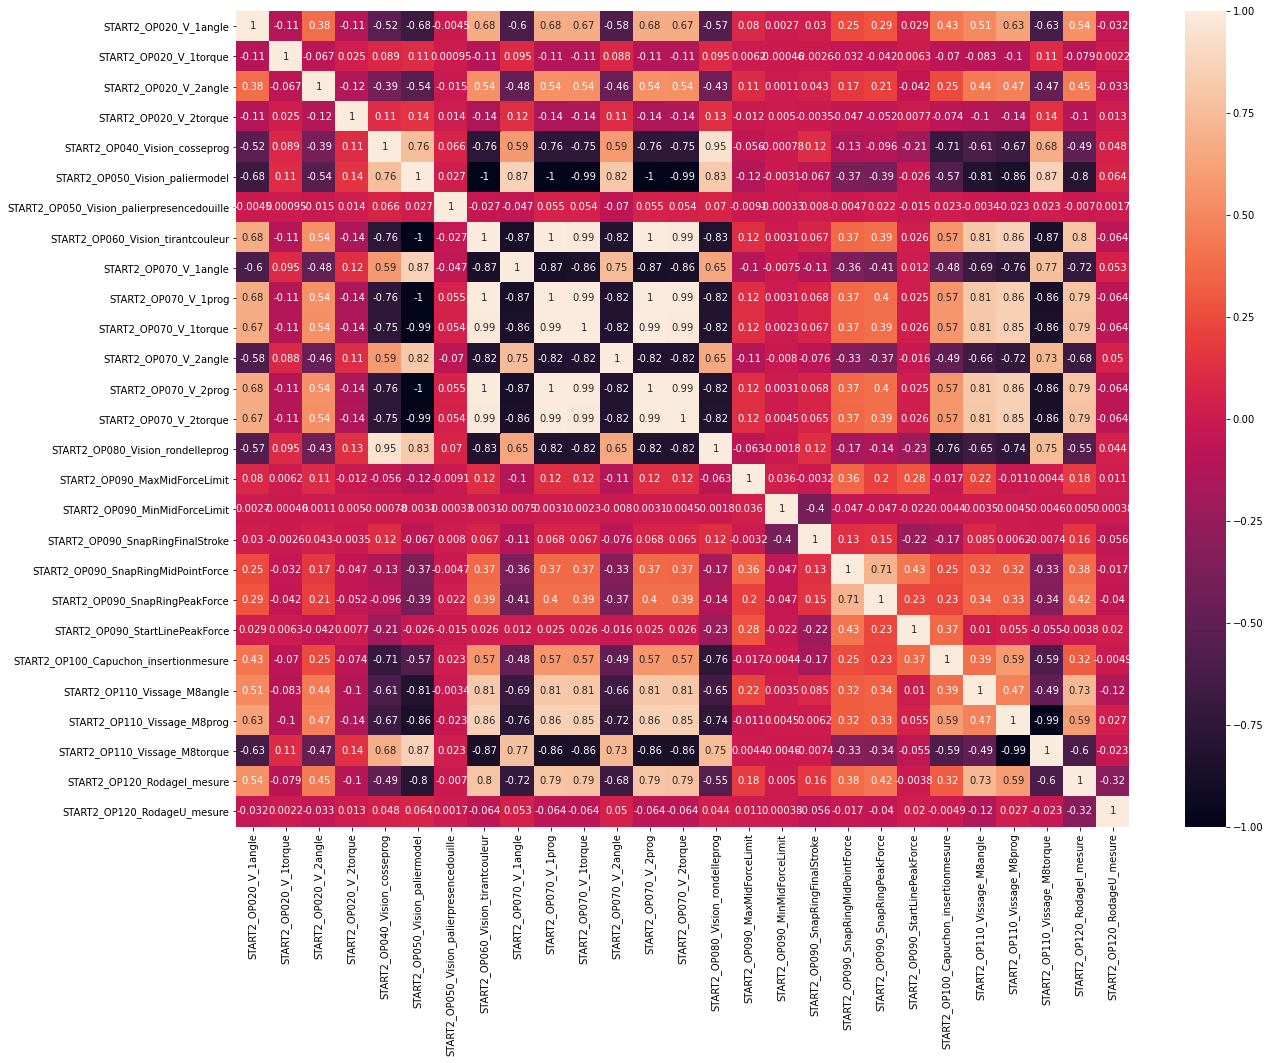

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(xtrain.corr(),annot=True)
#sns.heatmap(xtrain.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog', 'START2_OP090_MinMidForceLimit'],1).corr(),annot=True)

Beaucoup de variables ont des corrélations supérieures à 0.85. Nous allons envisager de n'en garder que certaines d'entres elles. Les variables les plus corrélées sont les variables qualitatives. Nous discuterons ci-desous du fait de les garder ou non en tant que variables explicatives.

In [12]:
xtrain.describe()

,START2_OP020_V_1angle,START2_OP020_V_1torque,START2_OP020_V_2angle,START2_OP020_V_2torque,START2_OP040_Vision_cosseprog,START2_OP050_Vision_paliermodel,START2_OP050_Vision_palierpresencedouille,START2_OP060_Vision_tirantcouleur,START2_OP070_V_1angle,START2_OP070_V_1prog,...,START2_OP090_SnapRingFinalStroke,START2_OP090_SnapRingMidPointForce,START2_OP090_SnapRingPeakForce,START2_OP090_StartLinePeakForce,START2_OP100_Capuchon_insertionmesure,START2_OP110_Vissage_M8angle,START2_OP110_Vissage_M8prog,START2_OP110_Vissage_M8torque,START2_OP120_RodageI_mesure,START2_OP120_RodageU_mesure
count,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,...,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000,27586.000000
mean,37.986635,3.775921,40.137958,3.777499,740.714420,1.670558,1.001486,1.329442,131.754241,7.330929,...,11.754024,84.061620,164.210221,30.445088,0.404118,22.743551,1.267020,11.492708,124.649516,11.958262
std,7.680003,0.017038,6.488604,0.012722,442.872201,0.470019,0.038524,0.470019,22.006941,0.470556,...,0.253366,15.176692,29.851088,11.815632,0.142146,12.199751,0.442411,1.165320,10.697002,0.264335
min,19.000000,3.750000,21.300000,3.750000,3.000000,1.000000,1.000000,1.000000,81.900000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,1.000000,0.060000,101.980000,3.050000
25%,31.700000,3.760000,35.000000,3.770000,300.000000,1.000000,1.000000,1.000000,110.200000,7.000000,...,11.590000,71.820000,136.630000,22.620000,0.230000,13.900000,1.000000,9.660000,116.560000,11.970000
50%,36.500000,3.770000,39.600000,3.770000,700.000000,2.000000,1.000000,1.000000,137.800000,7.000000,...,11.750000,82.135000,171.915000,27.020000,0.410000,17.700000,1.000000,12.160000,121.740000,11.970000
75%,43.600000,3.790000,45.000000,3.790000,1300.000000,2.000000,1.000000,2.000000,148.400000,8.000000,...,11.850000,92.900000,189.370000,36.990000,0.540000,30.800000,2.000000,12.220000,132.790000,11.970000
max,68.300000,3.850000,67.300000,3.830000,1500.000000,2.000000,2.000000,2.000000,208.300000,8.000000,...,12.580000,138.260000,237.170000,93.800000,0.600000,132.700000,2.000000,12.470000,206.370000,12.010000


En regardant, les valeurs max et min de chaque feature, nous pouvons mettre en évidence les features qualitatifs ainsi que les quantitatifs. 

Si l'on regarde attentivement la répartition des données, on remarque que certains features ont des valeurs extrêmes semblants au premier abord "abérrantes". Nous pouvons les voir dans les boxplots ci-dessous.

<ipython-input-42-70a0ea8fcdd7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-42-70a0ea8fcdd7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-42-70a0ea8fcdd7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-42-70a0ea8fcdd7>:2: RuntimeW

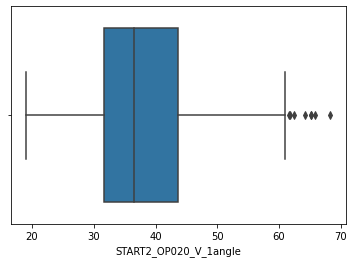

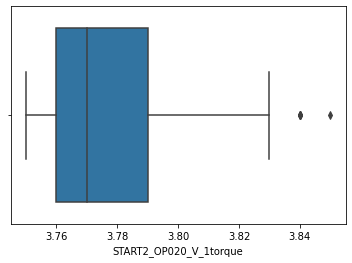

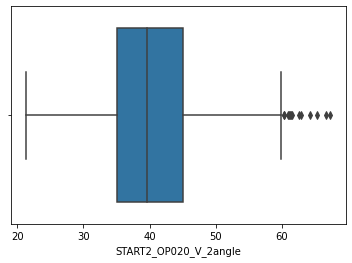

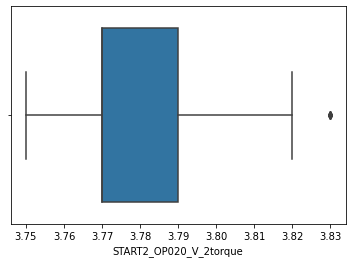

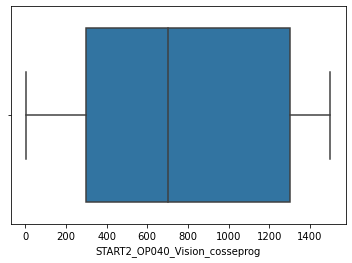

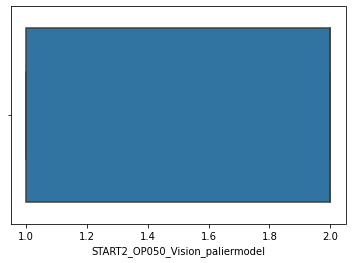

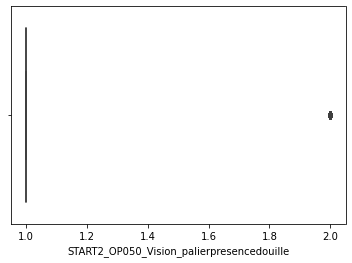

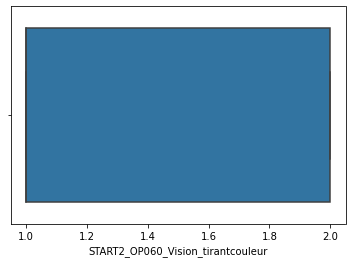

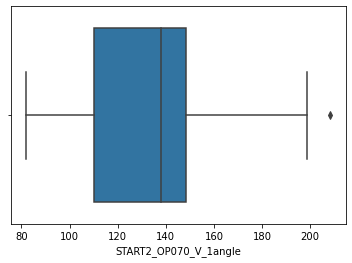

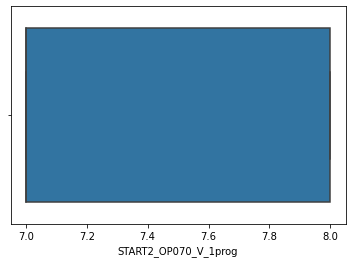

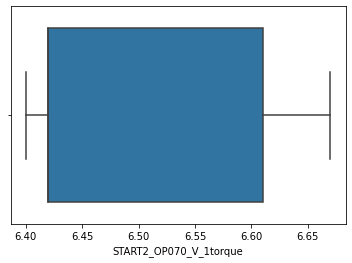

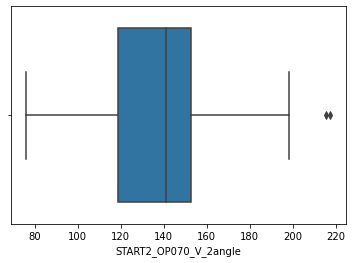

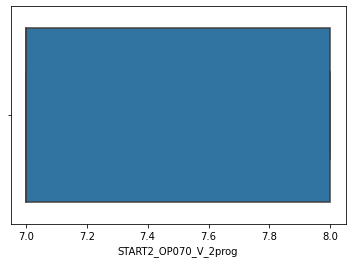

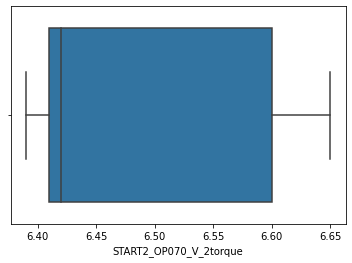

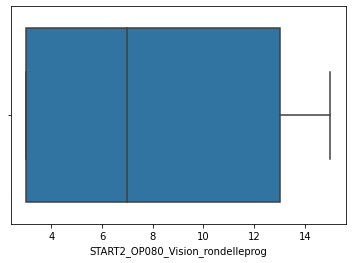

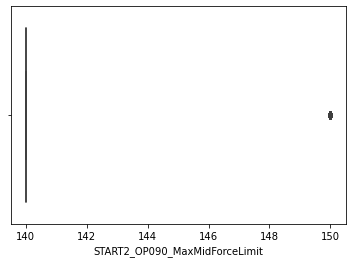

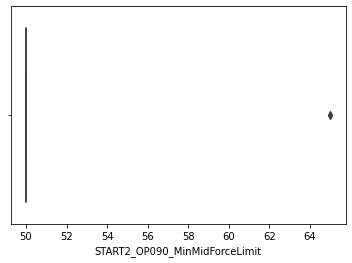

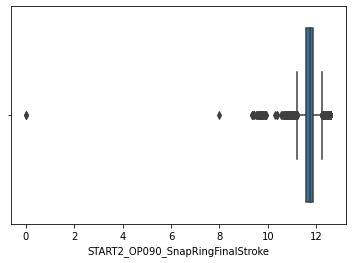

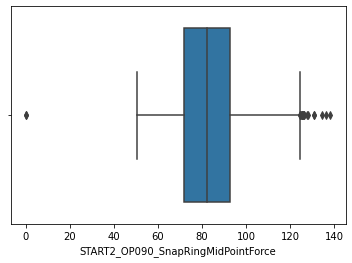

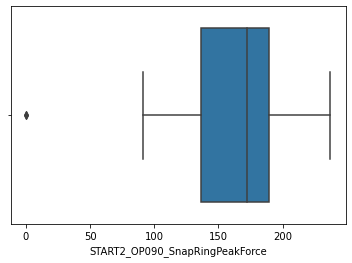

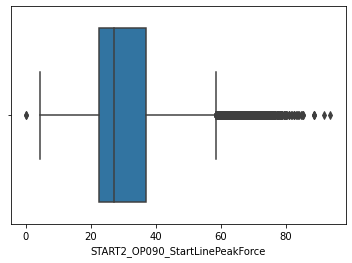

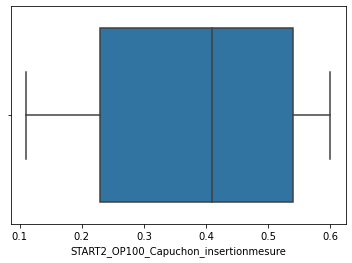

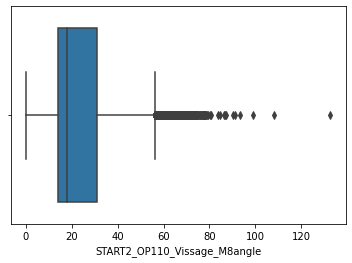

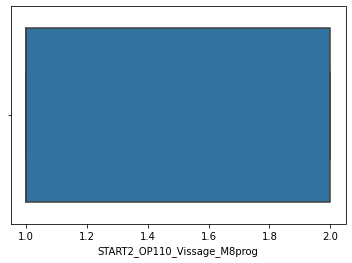

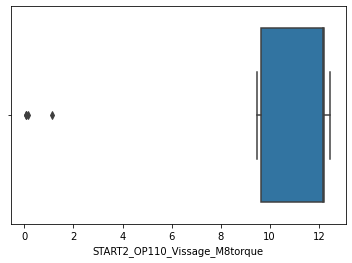

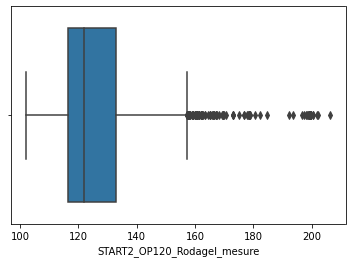

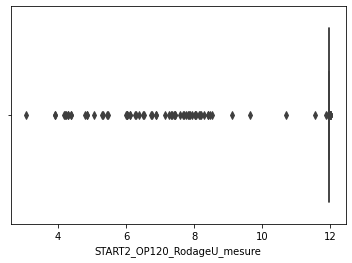

In [42]:
for i in xtrain.columns:
    plt.figure()
    sns.boxplot(xtrain[i]).plot

En regardant les boxplots ainsi que les minimums et maximums de chaque variables, peu de valeurs semblent vraiments abérantes ; il y a certes des valeurs un peu au desssus des autres mais un test a été effectué pour vérifier si en enlevant ces valeurs pseudo abérantes, les algorithmes basiques du genre Decision tree ou Random Forest s'amélioraient mais ce n'était pas le cas. Nous allons donc les garder.

# II - Prise en compte du déséquilibre des classes

Afin de résoudre le problème de déséquilibre des classes, nous avons essayer les méthodes ci-dessous :

* le paramètre "class_weight='balanced'"
* l'oversampling
* l'undersampling
* le One Class Classification

Le paramètre "class_weight='balanced'" est un paramètre à rajouter dans la plupart des modèles de sklearn, qui applique un poids inversement proportionnel au déséquilibre de chaque classe.

Avec l'oversampling, nous allons duppliquer la classe minoritaire pour avoir 2 classes équilibrées comme ci dessous :

In [27]:
#source : https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over["Anomaly"].value_counts()

1    21514
0    21514
Name: Anomaly, dtype: int64

Avec l'undeersampling, nous allons diminuer la classe majoritaire pour avoir 2 classes équilibrées comme ci-dessous :

In [28]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)
y_under["Anomaly"].value_counts()

1    554
0    554
Name: Anomaly, dtype: int64

Avec la One class Classification, nous allons considérer qu'il n'y a qu'une classe (la classe 0) et nous considérons que les données de classe 1 sont des outliers. Nous utiliserons les 3 modèles OneClassSVM, IsolationForest et EllipticEnvelope.

In [29]:
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from numpy import vstack


model = OneClassSVM(gamma='scale', kernel='rbf', nu=0.1)

#model = IsolationForest(contamination=0.03, bootstrap=True, random_state=0)

#model = EllipticEnvelope(contamination=0.03)


X_trainOneClass = X_train[y_train['Anomaly']==0]

model.fit(X_trainOneClass)

ypred = model.predict(X_test)

ypred[ypred==1]=0
ypred[ypred==-1]=1

roc_auc_score(y_test, ypred)

0.5098404265990442

Aucun modèle de One class Classification n'est pertinent.

De plus les résultats de l'oversampling et de l'undersampling sont moins bons que ceux du paramètre "class_weight='balanced'". Nous utiliserons ce paramètre pour les autres modèles dès que cela sera possible.

# III - Sélection des variables

Tous les algorithmes ci-dessous ont été testés sans filtres sur les variables explicatives. Malheuresement nous n'obtenons pas un score AUC supérieur à 0.77 avec toutes les variables. Nous allons donc effectuer une selection sur ces features. 

Dans un premier temps, nous avons remarquer que les valeurs des données des variables quantitatives ne diffèrent pas entre les produits défectueux et les produits normaux. Les variables qualitatives sont les suivantes : 

* START2_OP050_Vision_paliermodel
* START2_OP050_Vision_palierpresencedouille
* START2_OP060_Vision_tirantcouleur
* START2_OP070_V_1prog
* START2_OP070_V_2prog
* START2_OP110_Vissage_M8prog
* START2_OP090_MinMidForceLimit

Nous pouvons prendre par exemple, les lignes 10283 et 10284 car elles correspondent à un produit défectueux et un normal.

In [24]:
ytrain.iloc[10283:10285]

,Anomaly
10283,0
10284,1


In [25]:
xtrain.iloc[10283:10285][['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog', 'START2_OP090_MinMidForceLimit']]

,START2_OP050_Vision_paliermodel,START2_OP050_Vision_palierpresencedouille,START2_OP060_Vision_tirantcouleur,START2_OP070_V_1prog,START2_OP070_V_2prog,START2_OP110_Vissage_M8prog,START2_OP090_MinMidForceLimit
10283,2.0,1.0,1.0,7.0,7.0,1.0,50.0
10284,2.0,1.0,1.0,7.0,7.0,1.0,50.0


Nous voyons bien que ces variables ne diffèrent pas entre les produits défectueux et les produits normaux. L'algorithme n'apprendra donc pas plus avec ces features. Nous pouvons donc les mettre de côté.

Afin d'avoir un aperçu du score AUC de chacun de nos modèles avant la soumission, nous pouvons splitter le dataset xtarin en 2 datasets (X_train et X_test). Nous pouvons aussi utiliser la cross validation pour obtenir les meilleurs paramètres.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

# IV - Premiers Algos

## SGD

En ajoutant le paramètre "class_weight='balanced'" au classifier SGD et Logisticregression on applique un poids inversement proportionnel au déséquilibre de chaque classe. Nous pouvons regarder le AUC score de ces deux classifiers basiques avec ce paramètre pour ensuite essayer de les améliorer.

In [30]:
sgd_clf = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42, class_weight='balanced')
#sgd_clf.fit(xtrain, ytrain.values.ravel())

sgd_clf.fit(X_train, y_train.values.ravel())
roc_auc_score(y_test, sgd_clf.predict(X_test))

0.5205321520809008

## Logistic regression

In [32]:
clf = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train.values.ravel())

#clf.fit(X_over, y_over.values.ravel())
roc_auc_score(y_test, clf.predict(X_test))

0.7416217611521492

L'AUC Score de ce modèle est autour de 0.75 (0.7544 après soumission). Nous baserons nos évaluations de chaque modèle sur ce score de base, il faudra donc que le meilleur de nos modèles ait un score supérieur à celui là.

# V - Prise en compte des duplicats

In [33]:
xtrain.duplicated().sum()

327

Il y a donc 327 lignes dupliquées. Nous allons donc prendre ce critère en compte.

Nous allons donc garder que les features quantitatifs comme expliqué précédemment :

In [34]:
XtrainQuanti = xtrain[['START2_OP020_V_1angle',
'START2_OP020_V_1torque',
'START2_OP020_V_2angle',
'START2_OP020_V_2torque',
'START2_OP040_Vision_cosseprog',
'START2_OP070_V_1angle',
'START2_OP070_V_1torque',
'START2_OP070_V_2angle',
'START2_OP070_V_2torque',
'START2_OP080_Vision_rondelleprog',
'START2_OP090_MaxMidForceLimit',
'START2_OP090_SnapRingFinalStroke',
'START2_OP090_SnapRingMidPointForce',
'START2_OP090_SnapRingPeakForce',
'START2_OP090_StartLinePeakForce',
'START2_OP100_Capuchon_insertionmesure',
'START2_OP110_Vissage_M8angle',
'START2_OP110_Vissage_M8torque',
'START2_OP120_RodageI_mesure',
'START2_OP120_RodageU_mesure']]

On retrouve nos 327 ducplicats. Il serait intéressant de rajouter une variable qualitative fournissant l'information si oui ou non, il y a eu un duplicat. On peut penser que lorsque un produit est défectueux, Valeo va le refabriquer pour qu'il soit ensuite normal, ce qui explique la duplication de certaines lignes.

Avant nous allons centrer et réduire nos variables grâce à sklearn:
https://scikit-learn.org/stable/modules/preprocessing.html

Ensuite nous allons rajouter un feature qui nous indique si oui ou non la ligne possède un duplicat (=1 si oui, =0 sinon)

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(XtrainQuanti)
XtrainQuanti_scaled = scaler.transform(XtrainQuanti)

XtrainQuantiCentreeReduit=pd.DataFrame(XtrainQuanti_scaled,columns=['START2_OP020_V_1angle',
'START2_OP020_V_1torque',
'START2_OP020_V_2angle',
'START2_OP020_V_2torque',
'START2_OP040_Vision_cosseprog',
'START2_OP070_V_1angle',
'START2_OP070_V_1torque',
'START2_OP070_V_2angle',
'START2_OP070_V_2torque',
'START2_OP080_Vision_rondelleprog',
'START2_OP090_MaxMidForceLimit',
'START2_OP090_SnapRingFinalStroke',
'START2_OP090_SnapRingMidPointForce',
'START2_OP090_SnapRingPeakForce',
'START2_OP090_StartLinePeakForce',
'START2_OP100_Capuchon_insertionmesure',
'START2_OP110_Vissage_M8angle',
'START2_OP110_Vissage_M8torque',
'START2_OP120_RodageI_mesure',
'START2_OP120_RodageU_mesure'])

dupliquee=[]
for i in range(0, len(XtrainQuanti)):
    if i in XtrainQuanti[XtrainQuanti.duplicated(keep=False)].index.to_list():
        dupliquee.append(1)
    else:
        dupliquee.append(0)
        
XtrainQuantiCentreeReduit['Duplicat']=dupliquee

XtrainQuantiCentreeReduit

,START2_OP020_V_1angle,START2_OP020_V_1torque,START2_OP020_V_2angle,START2_OP020_V_2torque,START2_OP040_Vision_cosseprog,START2_OP070_V_1angle,START2_OP070_V_1torque,START2_OP070_V_2angle,START2_OP070_V_2torque,START2_OP080_Vision_rondelleprog,...,START2_OP090_SnapRingFinalStroke,START2_OP090_SnapRingMidPointForce,START2_OP090_SnapRingPeakForce,START2_OP090_StartLinePeakForce,START2_OP100_Capuchon_insertionmesure,START2_OP110_Vissage_M8angle,START2_OP110_Vissage_M8torque,START2_OP120_RodageI_mesure,START2_OP120_RodageU_mesure,Duplicat
0,-0.297744,-0.934470,1.381222,0.196550,-0.995146,-0.911285,1.319413,-1.300252,1.451815,-1.229489,...,-0.607923,-0.826389,-1.406347,-0.835780,1.026301,0.980075,-1.675714,0.215997,0.044407,0
1,1.199678,-0.347533,1.566165,-1.375506,-1.604814,-1.170299,1.214883,-1.237094,1.342819,-1.229489,...,0.260402,-1.099180,-0.014413,-0.991509,1.026301,1.307956,-1.675714,0.862919,0.044407,0
2,1.915837,0.239405,0.040386,0.196550,-0.995146,-1.288446,1.633005,-1.203086,1.560810,-1.229489,...,0.418280,0.331329,1.457922,-0.343203,1.026301,0.611208,-1.572736,0.993800,0.044407,0
3,-0.401913,-0.347533,-0.807270,0.196550,0.585474,0.647342,-0.666667,-0.187706,-0.619101,0.549354,...,-1.121024,0.618616,0.438846,-0.399062,1.307708,-0.421619,0.486821,-0.760929,0.044407,0
4,1.564268,-0.347533,0.271564,-2.161534,-0.769343,-0.724977,1.528474,-0.309163,1.451815,-0.975369,...,0.497218,0.073033,0.352415,-0.757069,0.111730,2.398162,0.538310,1.521060,0.082239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27581,-0.662334,2.000218,-0.067498,-0.589478,0.585474,-0.106979,-0.875729,-0.362604,-0.619101,0.549354,...,-0.094822,2.141374,1.255581,2.923715,1.378060,-0.347845,0.615543,-0.203754,0.044407,0
27582,-0.271702,2.000218,-0.560679,0.982577,1.262883,0.910900,-0.562137,1.332936,-0.619101,1.311715,...,-0.055352,1.881101,1.090090,0.377889,-1.224952,-0.667530,0.555473,-0.219646,0.044407,0
27583,0.639772,0.239405,0.641450,-0.589478,-0.995146,-1.920076,1.423944,-1.363410,1.560810,-1.229489,...,0.576157,0.742493,1.615708,-0.003816,1.026301,0.512843,-1.615644,0.956405,0.082239,0
27584,0.822067,-1.521408,-0.237029,1.768605,-0.091934,0.397416,-0.562137,1.036580,-0.728096,-0.213007,...,-0.607923,-1.242165,-0.960124,0.865387,0.041378,-0.733106,0.632706,-0.826370,0.044407,0


Pour appliquer cette méthode, nous allons écrire une fonction qui traite les données de xtest, comme nous l'avons fait prédédemment.

In [36]:
def PreProcData(df):
    XQuanti=df[['START2_OP020_V_1angle',
                'START2_OP020_V_1torque',
                'START2_OP020_V_2angle',
                'START2_OP020_V_2torque',
                'START2_OP040_Vision_cosseprog',
                'START2_OP070_V_1angle',
                'START2_OP070_V_1torque',
                'START2_OP070_V_2angle',
                'START2_OP070_V_2torque',
                'START2_OP080_Vision_rondelleprog',
                'START2_OP090_MaxMidForceLimit',
                'START2_OP090_SnapRingFinalStroke',
                'START2_OP090_SnapRingMidPointForce',
                'START2_OP090_SnapRingPeakForce',
                'START2_OP090_StartLinePeakForce',
                'START2_OP100_Capuchon_insertionmesure',
                'START2_OP110_Vissage_M8angle',
                'START2_OP110_Vissage_M8torque',
                'START2_OP120_RodageI_mesure',
                'START2_OP120_RodageU_mesure']]
    
    scaler = preprocessing.StandardScaler().fit(XQuanti)
    XQuanti_scaled = scaler.transform(XQuanti)
    
    XQuantiCentreeReduit=pd.DataFrame(XQuanti_scaled,columns=['START2_OP020_V_1angle',
                                                                'START2_OP020_V_1torque',
                                                                'START2_OP020_V_2angle',
                                                                'START2_OP020_V_2torque',
                                                                'START2_OP040_Vision_cosseprog',
                                                                'START2_OP070_V_1angle',
                                                                'START2_OP070_V_1torque',
                                                                'START2_OP070_V_2angle',
                                                                'START2_OP070_V_2torque',
                                                                'START2_OP080_Vision_rondelleprog',
                                                                'START2_OP090_MaxMidForceLimit',
                                                                'START2_OP090_SnapRingFinalStroke',
                                                                'START2_OP090_SnapRingMidPointForce',
                                                                'START2_OP090_SnapRingPeakForce',
                                                                'START2_OP090_StartLinePeakForce',
                                                                'START2_OP100_Capuchon_insertionmesure',
                                                                'START2_OP110_Vissage_M8angle',
                                                                'START2_OP110_Vissage_M8torque',
                                                                'START2_OP120_RodageI_mesure',
                                                                'START2_OP120_RodageU_mesure'])
    
    dupliquee=[]
    for i in range(0, len(XQuanti)):
        if i in XQuanti[XQuanti.duplicated(keep=False)].index.to_list():
            dupliquee.append(1)
        else:
            dupliquee.append(0)
            
    XQuantiCentreeReduit['Duplicat']=dupliquee
    
    return (XQuantiCentreeReduit)

In [37]:
XFinal=PreProcData(xtest)

Nous pouvons aussi ne pas prendre en compte les lignes dupliquées avec le label égal à 0. En effet, on peut considérer que le plus intéressant pour l'algorithme est de savoir quand la ligne a été dupliqué car cela correspond à un produit défecteux. Mais lorsque celui-ci a été refait, cette nouvelle donnée est moins intéressante car son label est de 0. Nous voulons surtout les valeurs de chaque feature quand le produit est défectueux.

In [38]:
DfEssai=pd.concat([XtrainQuantiCentreeReduit, ytrain], axis=1)
Df3=DfEssai.loc[XtrainQuanti[XtrainQuanti.duplicated(keep=False)].index.to_list()]
IndexNotTaken=Df3.loc[Df3['Anomaly']==0].index.tolist()
len(IndexNotTaken)

331

In [39]:
indice=range(0,len(XtrainQuantiCentreeReduit))
IndexTake=[]
for i in indice:
    if i not in IndexNotTaken:
        IndexTake.append(i)

In [40]:
dftrain, dftest, Y_dftrain, Y_dftest= train_test_split(XtrainQuantiCentreeReduit.iloc[IndexTake], ytrain.iloc[IndexTake], test_size=0.1, random_state=0)

Nous allons utiliser un random forest pour selectionner les variables quantitatives pertinentes

### Radom forest selection variable

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X_trainRFS, X_testRFS, y_trainRFS, y_testRFS = train_test_split(XtrainQuantiCentreeReduit, ytrain, test_size=0.2, random_state=0)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_trainRFS, y_trainRFS)
sel.get_support()

/Users/amandineguignard/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_from_model.py:234: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([ True, False,  True, False, False,  True, False,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True])

In [53]:
selected_feat= X_trainRFS.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

11
Index(['START2_OP020_V_1angle', 'START2_OP020_V_2angle',
       'START2_OP070_V_1angle', 'START2_OP070_V_2angle',
       'START2_OP090_SnapRingFinalStroke',
       'START2_OP090_SnapRingMidPointForce', 'START2_OP090_SnapRingPeakForce',
       'START2_OP090_StartLinePeakForce', 'START2_OP110_Vissage_M8angle',
       'START2_OP120_RodageI_mesure', 'Duplicat'],
      dtype='object')


In [54]:
profMax = 10
profondeurs = np.arange(1, profMax)
scores = np.zeros(10)
maxScore=0
Meilleurprof=0

for i in profondeurs:
    rf = RandomForestClassifier(max_depth=i, n_estimators=100, class_weight='balanced_subsample')
    rf.fit(X_trainRFS[selected_feat], y_trainRFS.values.ravel())
    if roc_auc_score(y_testRFS, rf.predict(X_testRFS[selected_feat])) > maxScore :
        maxScore=roc_auc_score(y_testRFS, rf.predict(X_testRFS[selected_feat]))
        Meilleurprof=i
        
print("meilleur score de",maxScore, "obtenu avec une profondeur de", Meilleurprof)

meilleur score de 0.8145907144892006 obtenu avec une profondeur de 3


#### En ajoutant des features en plus de celles qui ont été selectionnées par le Random Forest, nous obtenons un score encore plus élevé. Nous choisirons donc les variables ci dessous : 

In [56]:
new_selected_feat=['START2_OP020_V_1angle',
                    'START2_OP020_V_1torque',
                    'START2_OP020_V_2angle',
                    'START2_OP020_V_2torque',
                    'START2_OP040_Vision_cosseprog',
                    #'START2_OP090_MaxMidForceLimit',
                    'START2_OP090_SnapRingFinalStroke',
                    'START2_OP090_SnapRingMidPointForce',
                    'START2_OP090_SnapRingPeakForce',
                    'START2_OP090_StartLinePeakForce',
                    'START2_OP100_Capuchon_insertionmesure',
                    'START2_OP120_RodageI_mesure',
                    'START2_OP120_RodageU_mesure',
                    'Duplicat']

In [64]:
profMax = 10
profondeurs = np.arange(1, profMax)
scores = np.zeros(10)
maxScore=0
Meilleurprof=0

for i in profondeurs:
    rf = RandomForestClassifier(max_depth=i, n_estimators=100, class_weight='balanced_subsample')
    rf.fit(X_trainRFS[new_selected_feat], y_trainRFS.values.ravel())
    if roc_auc_score(y_testRFS, rf.predict(X_testRFS[new_selected_feat])) > maxScore :
        maxScore=roc_auc_score(y_testRFS, rf.predict(X_testRFS[new_selected_feat]))
        Meilleurprof=i
        
print("meilleur score de",maxScore, "obtenu avec une profondeur de", Meilleurprof)

meilleur score de 0.8369819481837842 obtenu avec une profondeur de 4


La corrélation entre les variables restantes est donc maintenant beaucoup moins élevée.

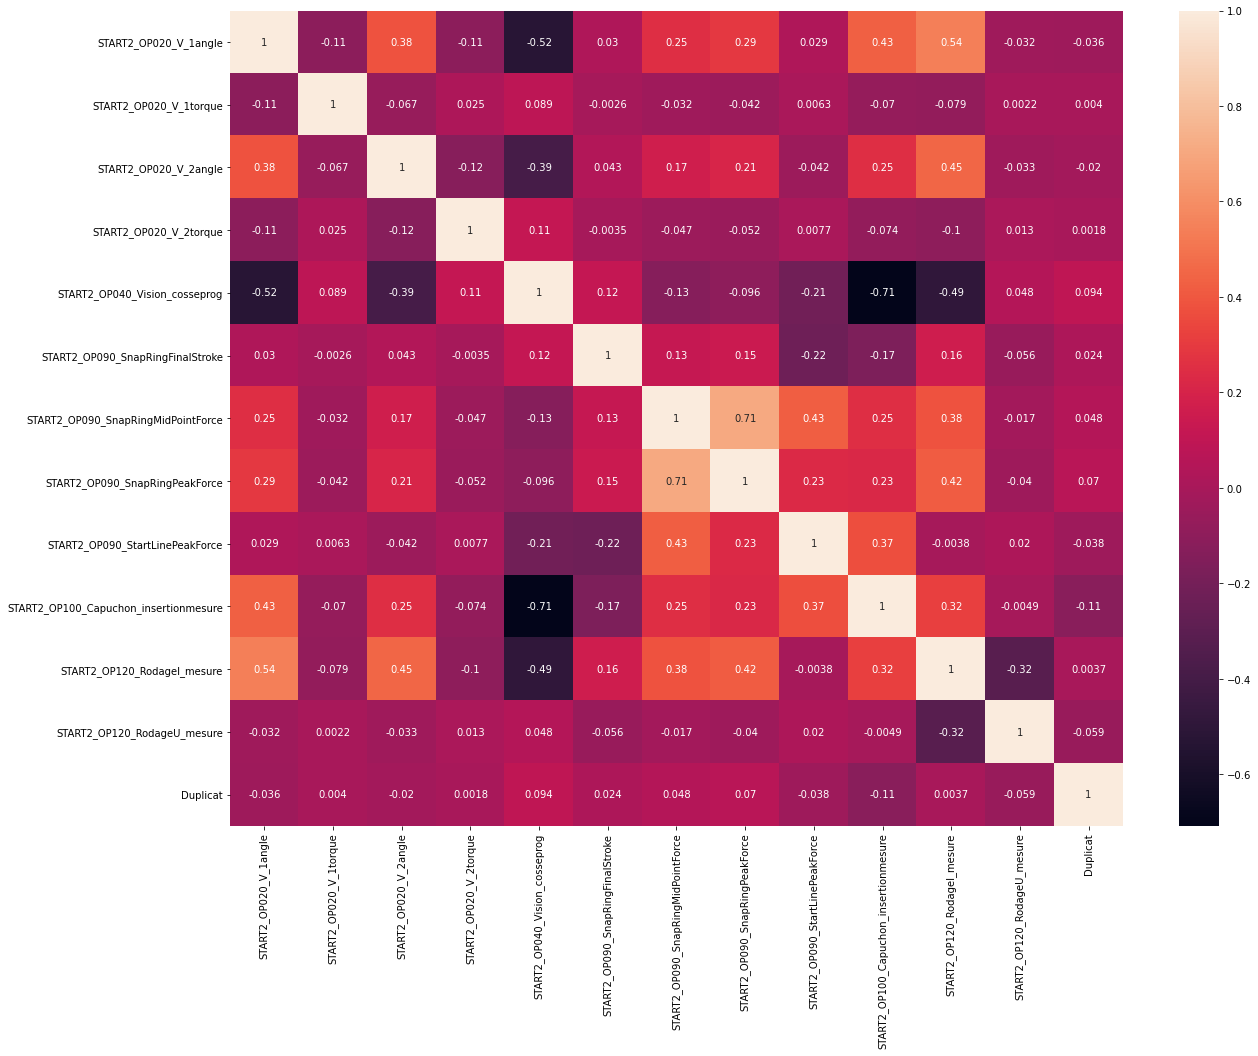

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(XtrainQuantiCentreeReduit[new_selected_feat].corr(),annot=True)

# VI - Decision tree

In [58]:
#decision tree
profMax = 10
profondeurs = np.arange(1, profMax)
scores = np.zeros(10)
maxScore=0
Meilleurprof=0
for i in profondeurs:
    dtc = DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    dtc.fit(dftrain[new_selected_feat], Y_dftrain.values.ravel())
    if roc_auc_score(Y_dftest, dtc.predict(dftest[new_selected_feat])) > maxScore :
        maxScore=roc_auc_score(Y_dftest, dtc.predict(dftest[new_selected_feat]))
        Meilleurprof=i
        
print("meilleur score de",maxScore, "obtenu avec une profondeur de", Meilleurprof)

meilleur score de 0.8719477836213374 obtenu avec une profondeur de 3


In [59]:
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

dtc = DecisionTreeClassifier(class_weight='balanced')

grid_search = GridSearchCV(dtc , param_grid=params, cv=6, scoring='roc_auc')
grid_search.fit(XtrainQuantiCentreeReduit[new_selected_feat], ytrain.values.ravel())
print(grid_search.best_params_)

{'max_depth': 4}


Malgré le GridSearch, nous obtenons un meilleur score avec une profondeur de 3.

In [60]:
dtc = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dtc.fit(XtrainQuantiCentreeReduit.iloc[IndexTake][new_selected_feat], ytrain.iloc[IndexTake].values.ravel())
sscore = dtc.predict(XFinal[new_selected_feat])
np.savetxt('ytest_DTCsans0_challenge_Michalewicz_Axel.csv', sscore, fmt = '%1.6f', delimiter=',')

Le score obtenu après soumission est plus proche de 0.83. Ce qui est plutôt correct pour l'instant.

# VII - Random Forest

In [61]:
#random forest
profMax = 10
profondeurs = np.arange(1, profMax)
scores = np.zeros(10)
maxScore=0
Meilleurprof=0
for i in profondeurs:
    rf = RandomForestClassifier(max_depth=i, n_estimators=100, class_weight='balanced_subsample')
    rf.fit(dftrain[new_selected_feat], Y_dftrain.values.ravel())
    if roc_auc_score(Y_dftest, rf.predict(dftest[new_selected_feat])) > maxScore :
        maxScore=roc_auc_score(Y_dftest, rf.predict(dftest[new_selected_feat]))
        Meilleurprof=i
        
print("meilleur score de",maxScore, "obtenu avec une profondeur de", Meilleurprof)

meilleur score de 0.8555362509391435 obtenu avec une profondeur de 7


In [62]:
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

grid_search = GridSearchCV(rf , param_grid=params, cv=6, scoring='roc_auc')
grid_search.fit(XtrainQuantiCentreeReduit[new_selected_feat], ytrain.values.ravel())
print(grid_search.best_params_)

{'max_depth': 5}


In [63]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100, class_weight='balanced_subsample')
rf.fit(XtrainQuantiCentreeReduit[new_selected_feat], ytrain.values.ravel())
sscore=rf.predict(XFinal[new_selected_feat])
np.savetxt('ytest_DupliRF5_challenge_Michalewicz_Axel.csv', sscore, fmt = '%1.6f', delimiter=',')

Après soumission, nous obtenons pour l'instant notre meilleur score de 0.833337756432 avec max_depth=5. Le random forest reste meilleur qu'un simple arbre de décison.

# VIII - Ensemble Learning

## Adaboost

Nous allons tester Adaboost avec des classifier "weak learner" : nous allons essayer avec des arbres de classification, un random forest et une logistic regression. Les arbres de décision et random forest, auront un max_depth de 1 ou 2 étant donné que ce sont des weak learners. Après un essai avec ces 3 types de modèles, c'est le random forest qui obtient de meilleur score AUC. Nous allons donc garder le random forest pour Adaboost.

In [65]:
dtc = DecisionTreeClassifier(max_depth=1, class_weight='balanced')
LogReg = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(max_depth=1, n_estimators=100, class_weight='balanced_subsample')

ABclf = AdaBoostClassifier(base_estimator=rf, n_estimators=100, random_state=0)

ABclf.fit(XtrainQuantiCentreeReduit.iloc[IndexTake][new_selected_feat], ytrain.iloc[IndexTake].values.ravel())

roc_auc_score(Y_dftest, ABclf.predict(dftest[new_selected_feat]))

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                         max_depth=1),
                   n_estimators=100, random_state=0)

In [66]:
sscore=ABclf.decision_function(XFinal[new_selected_feat])
np.savetxt('ytest_DupliADAsans0NewFeat_challenge_Michalewicz_Axel.csv', sscore, fmt = '%1.6f', delimiter=',')

In [74]:
#source https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

params = {'base_estimator__max_depth':[1,2,3,4,5]}

gs = GridSearchCV(AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')), params,cv=6, scoring='roc_auc')
gs.fit(XtrainQuantiCentreeReduit, ytrain.values.ravel())
print(gs.best_params_)

{'base_estimator__max_depth': 2}



Avec le GridSearch nous avons essayé d'obtenir les meilleurs paramètres pour Adaboost: nous obtenons un max depth optimal de 2.

### Nous obtenons donc notre meilleur score de 0.880288358371 avec un max_depth de 2.
### En enlevant les duplicats qui ne sont pas en anomalies (y=0), nous atteignons  un score de 0.886876459752.
### De plus en jouant sur le learning rate, nous arrivons à obtenir un score de 0.892209887076 : c'est le meilleur score que nous avons obtenu jusque là.

## Gradient Boosting

In [67]:
profMax = 7
profondeurs = np.arange(1, profMax, 1)
scores = np.zeros(10)
maxScore=0
Meilleurprof=0
for i in profondeurs:
    clfGBC = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.47, max_depth=i, random_state=0,)
    clfGBC.fit(dftrain, Y_dftrain.values.ravel())
    if roc_auc_score(Y_dftest, clfGBC.predict(dftest)) > maxScore :
        maxScore=roc_auc_score(Y_dftest, clfGBC.predict(dftest))
        Meilleurprof=i
        
print("meilleur score de",maxScore, "obtenu avec une profondeur de", Meilleurprof)

meilleur score de 0.7529289537941398 obtenu avec une profondeur de 6


In [68]:
params = {'max_depth':[1,2,3,4,5,6,7]}

clfGBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.47, random_state=0)

grid_search = GridSearchCV(clfGBC , param_grid=params, cv=6, scoring='roc_auc')
grid_search.fit(XtrainQuantiCentreeReduit[new_selected_feat], ytrain.values.ravel())
print(grid_search.best_params_)

{'max_depth': 2}


In [69]:
clfGBC = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.47, max_depth=2, random_state=0)
clfGBC.fit(dftrain, Y_dftrain.values.ravel())
roc_auc_score(Y_dftest, clfGBC.predict(dftest))

0.7488730277986476

La différence entre le gradient boosting et Adaboost, donnant le même poids à chaque weak learner, ne nous permets pas d'obtenir de meilleur résultat. Après soumission, nous obtenons même un résultat moins bon qu'une basique logistique regression.

# IX - KNN

Afin de trouver le meilleur nombre de voisins à prendre compte pour le KNN, nous avons augmenté de 100 en 100, pour trouver le meilleur score. Du plus, nous ne pouvons pas utiliser le paramètre "class_weight='balanced'", nous utiliserons dans ce cas là l'oversampling. Nous enlèverons les variables qualitatives dans l'algortithmes du KNN.

In [70]:
NeighMax = 400
NBneigh = np.arange(260, NeighMax, 10)
scores = np.zeros(10)
maxScore=0
MeilleurN=0
for i in NBneigh:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_over.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog', 'START2_OP090_MinMidForceLimit'],1), y_over.values.ravel())
    if roc_auc_score(y_test, knn.predict(X_test.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog', 'START2_OP090_MinMidForceLimit'],1))) > maxScore :
        maxScore=roc_auc_score(y_test, knn.predict(X_test.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog', 'START2_OP090_MinMidForceLimit'],1)))
        MeilleurN=i
        
print("meilleur score de",maxScore, "obtenu avec", MeilleurN, "voisins")

meilleur score de 0.7684767969227517 obtenu avec 330 voisins


In [72]:
knn=KNeighborsClassifier(n_neighbors=330)
knn.fit(X_over.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog'],1), y_over.values.ravel())
roc_auc_score(y_test, knn.predict(X_test.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog'],1)))

0.7684767969227517

In [73]:
sscore=knn.predict(xtest.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog'],1))
np.savetxt('ytest_KNN_challenge_Michalewicz_Axel.csv', sscore, fmt = '%1.6f', delimiter=',')

Le score du KNN reste légèrement meilleur qu'un Logistic regression mais est nettement moins bon que AdaBoost. Nous ne retenons cet algorithme.

# X - Multi Layer Perceptron

Essayons un MLP. Ici non plus, nous ne pouvons pas utiliser le paramètre "class_weight='balanced'", nous utiliserons dans ce cas là l'oversampling. Nous enlèverons les variables qualitatives dans le MLP car il faut cetré et réduire notre echantillon test.

Nous avons essayer plusieurs architectures du MLP, toutes ont obtenu des scores peu probants, mais nous allons regarder celui qui a obtenu un score à peu près correct. Nous avons choisi un MLP à 4 couches. En jouant sur le learning rate, nous obtenons un meilleur score plus rapidement avec un learning rate égal à 0.1. Nous utiliserons un fonction loss de type "Binary Cross Entropy".

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

X = torch.from_numpy(np.array(X_over.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog','START2_OP090_MinMidForceLimit'],1))).float()
y = torch.from_numpy(np.array(y_over)).float()

#Normalization
X -= X.mean(dim=0)
X /= X.std(dim=0)

# Définition des hyperparamètres
n_in = X.shape[1]
n_h1 = 20
n_h2 = 20
n_h3 = 10
n_h4 = 10
n_out = 1 

nb_epoch = 10000

student = True

In [76]:
class Net(torch.nn.Module):
    def __init__(self, n_in, n_h1, n_h2, n_h3, n_h4, n_out):
        super(Net, self).__init__()
        
        if student:
            self.fc1 = nn.Linear(n_in, n_h1) # hidden layer 1
            self.fc2 = nn.Linear(n_h1, n_h2) # hidden layer 2
            self.fc3 = nn.Linear(n_h2, n_h3) # hidden layer 2
            self.fc4 = nn.Linear(n_h3, n_h4) # hidden layer 2
            self.fc5 = nn.Linear(n_h4, n_out)# output layer
        
    def forward(self, X):
        
        if student:
            A0 = X
            A1 = F.relu(self.fc1(A0))   # activation function for hidden layer 1
            A2 = F.relu(self.fc2(A1))   # activation function for hidden layer 2
            A3 = F.relu(self.fc3(A2))   # activation function for hidden layer 2
            A4 = F.relu(self.fc4(A3))   # activation function for hidden layer 2
            A5 = torch.sigmoid(self.fc5(A4))   # activation function for output layer

        return A5
            


my_model = Net(n_in, n_h1, n_h2, n_h3, n_h4, n_out)

if student:
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(my_model.parameters(), lr=0.1, momentum=0.83)

epoch 0, loss 0.6973435282707214
epoch 500, loss 0.42006954550743103
epoch 1000, loss 0.5746991038322449
epoch 1500, loss 0.27552250027656555
epoch 2000, loss 0.33427783846855164
epoch 2500, loss 0.26771947741508484
epoch 3000, loss 0.2726798951625824
epoch 3500, loss 0.1939249187707901
epoch 4000, loss 0.231710746884346
epoch 4500, loss 0.1869155764579773
epoch 5000, loss 0.17046812176704407
epoch 5500, loss 0.17147128283977509
epoch 6000, loss 0.15430310368537903
epoch 6500, loss 0.14169451594352722
epoch 7000, loss 0.17245839536190033
epoch 7500, loss 0.20598074793815613
epoch 8000, loss 0.29743489623069763
epoch 8500, loss 0.17578011751174927
epoch 9000, loss 0.16334836184978485
epoch 9500, loss 0.1542162001132965


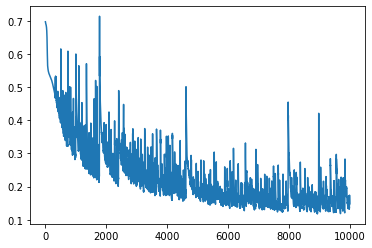

In [77]:
loss_l = []
for num_epoch in range(nb_epoch):
  
    if student:
        hat_y = my_model.forward(X) # Forward pass: Compute predicted y by passing  x to the model          
        loss = criterion(hat_y, y) # Compute loss 
        optimizer.zero_grad() # re-init the gradients (otherwise they are cumulated)
        loss.backward() # perform back-propagation
        optimizer.step() # update the weights
        
    loss_l.append(loss)

    if num_epoch % 500 == 0:
        print('epoch {}, loss {}'.format(num_epoch, loss.item()))
        
# ----------------
plt.plot(loss_l)

In [78]:
Xtst = torch.from_numpy(np.array(X_test.drop(['START2_OP050_Vision_paliermodel','START2_OP050_Vision_palierpresencedouille','START2_OP060_Vision_tirantcouleur','START2_OP070_V_1prog','START2_OP070_V_2prog','START2_OP110_Vissage_M8prog','START2_OP090_MinMidForceLimit'],1))).float()
ytst = torch.from_numpy(np.array(y_test)).float()

Xtst -= Xtst.mean(dim=0)
Xtst /= Xtst.std(dim=0)

prediction=my_model(Xtst).detach().numpy()

pred=[]
for i in range(len(prediction)):
    if prediction[i]>0.5:
        pred.append(1)
    else:
        pred.append(0)

roc_auc_score(y_test, pred)

0.7005701629438223

Le MLP, d'ordinaire très efficace, ne permet pas ici de bien classifier nos données. Même avec un oversampling, nous arrivons très mal à déterminer la classe des produits (défecteux ou non).

# Conslusion

Pour conclure, notre meilleur modèle sera celui d'Adaboost avec des weak learner de type Random forest avec une max depth de 1. Notre meilleur score est donc de 0.892209887076.

Nous avons aussi testé d'autres types d'algorithmes du type SVM par exemple, mais étant donné la difficulté de séparer les 2 classes par un plan dans une dimension plus grande, cet algorithme ne fonctionne pas beaucoup, les résultats obtenus sont plutôt mauvais, ils sont mêmes moins bons que celui de la simple regression logistique avec le paramètre "class_weight='balanced'".

Il semble qu'il eu fallu faire une étape en plus dans le data processing pour dépasser un score AUC de 0.90. Malheureusement je n'ai pas réussi à trouver cette étape.